## Bank Marketing Prediction

**Practice Project-4  Submitted By Bisola Beauty Ayankoya**

## Project Overview

A retail banking institution in Portugal is experiencing a decline in revenue due to decreased frequency of client deposits. To counter this, they aim to focus their marketing efforts on term deposit subscriptions, a significant income source. Term deposits involve clients investing cash for a fixed period, earning interest. The bank employs various marketing channels, including telephonic campaigns, which are effective but resource-intensive. Identifying potential term deposit subscribers in advance can optimize marketing efforts and reduce costs. Client data such as age, occupation, marital status, along with call details like duration and timing, are been provided.The objective is to predict client subscription likelihood, aiding targeted marketing strategies.

**Motivation** : To Predict Whether The Customer Will Subscribe To Term Deposit **(FIXED DEPOSIT)** or not.

**About The Dataset**: The dataset pertains to the direct marketing efforts, specifically by phone calls, conducted by a Portuguese bank. The classification goal of this dataset is to predict whether clients or customers of a Polish bank will opt for a term deposit offered by the institution or not.Below are the links to the dataset of the project:

https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv

https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv

In [1]:
# Import all required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
import joblib
from sklearn.metrics import plot_roc_curve

In [2]:
# Importing the datasets
df_train = pd.read_csv('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Bank%20Marketing/termdeposit_train.csv')
df_test = pd.read_csv('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Bank%20Marketing/termdeposit_test.csv')

In [3]:
# Exploring the data
df_train.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [4]:
df_train.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31637,20110,44,technician,married,secondary,no,5163,no,no,cellular,11,aug,48,2,-1,0,unknown,no
31638,16309,29,blue-collar,married,secondary,no,721,yes,no,cellular,23,jul,644,1,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


## Exploratory Data Analysis(EDA)

In [5]:
# Let's Display the first few rows of the train dataset
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
#Checking the train data dimension
df_train.shape

(31647, 18)

The dataset contains 31,647 rows and 18 columns.Hence, we have 1 target variable and 17 independent varbiables.

In [7]:
# Check column for train data
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
# Check column for test data
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [9]:
# Checking the list of columns for dataset
df_train.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [10]:
# checking the types of columns
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We have two(2) different types of data(int64 and object) present in the dataset.

In [11]:
#checking the null values
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
df_train.isnull().sum().sum()

0

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


There are no missing values in the Data Set, all complete 31647

**The Attributes**

Here is the description of all the variables:

**Independent Variables**
1. **ID**:Unique client ID
2. **age**:Age of the client
3. **job**:Type of job
4. **marital**:Marital status of the client
5. **education**:Education level
6. **default**:Credit in default.
7. **housing**:Housing loan
8. **loan**:Personal loan
9. **contact**:Type of communication
10. **month**:Contact month
11. **day_of_week**:Day of week of contact
12. **duration**:Contact duration
13. **campaign**:number of contacts performed during this campaign to the client
14. **pdays**:number of days that passed by after the client was last contacted
15.	**previous**:number of contacts performed before this campaign
16. **poutcome**:outcome of the previous marketing campaign

**Dependent variable** (desired target):

 17. **Subscribed (target)**: has the client subscribed a term deposit? (YES/NO)

<AxesSubplot:>

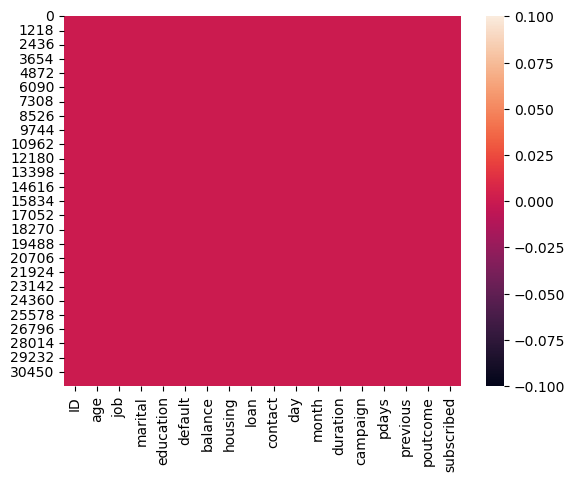

In [14]:
#Lets visualize using heatmap
sns.heatmap(df_train.isnull())

And we can clearly see that there are no missing data present.

In [15]:
# Lets get a good overview of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


The dataset exhibits certain attributes, such as indexing type, column type, absence of null values, and memory usage..

In [16]:
# Lets now describe the numerical columns of the dataframe 
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [17]:
# Separate the numerical from categorical columns

#check out the categorical columns
categorical_col = []
for i in df_train.dtypes.index:
    if df_train.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns:", categorical_col)
print("\n")

#Check for Numerical column
numerical_col = []
for i in df_train.dtypes.index:
    if df_train.dtypes[i]!= "object":
        numerical_col.append(i)
print("numerical columns:", numerical_col)

categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


numerical columns: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [18]:
# Checking unique values of objects-column
for col in df_train.select_dtypes(include='object').columns:
    print(col)
    print(df_train[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


The column contains nine(9) categorical features, with the "job" and "month" being the most frequent.

In [19]:
# Finding number of unique values in each column
df_train.nunique().to_frame("No.of unique values")

,No.of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


All the features have more than one single value

In [20]:
# Dropping ID column
df_train.drop("ID", axis = 1, inplace = True)

In [21]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [22]:
# Checking the list of counts of target
df_train["subscribed"].unique()

array(['no', 'yes'], dtype=object)

There are two categories present in the target column namely "Yes" and "No"

In [23]:
# Checking the unique values in target column
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

Let's consider that "No" represents the customers who have not yet subscribed, while "Yes" represents those who have already subscribed to the Term Deposit with the Bank.

### Dataset Description

In [24]:
# Statistical summary of numerical columns
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


These are the statistical details of the numerical columns.The dataset summary looks good because there are no -ve/invalid values present.

Hence, from the above we can analyse further-:

1. The counts of all the columns are of same values, hence there are no missing values in the dataset.
2. The mean value is greater than the median(50%) in the age,balance,duration,campaign,pdays and previous column which means the data is skewed to right in these column.
3. The data in the column day have mean value less than median which means the data is skewed to left.
4. By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data.
5. We can also notice the Standard deviation,min,25% percentile from this describe method.

In [25]:
# Lets also check the statistical distribution for numerical features
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


# Data Visualization

**Univariate analysis**

no     27932
yes     3715
Name: subscribed, dtype: int64


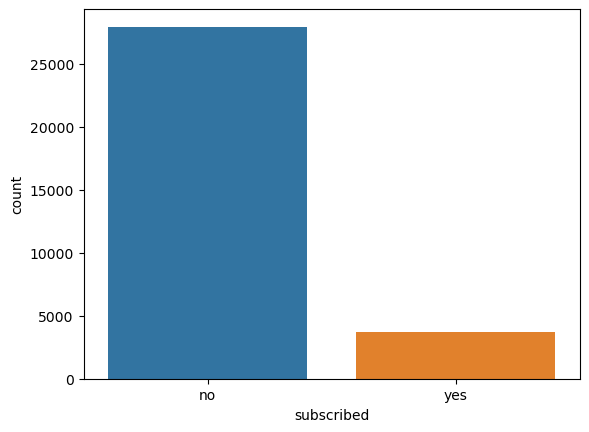

In [26]:
# Visualizing the number of subscribed customers
ax = sns.countplot(x='subscribed', data=df_train) 
print(df_train['subscribed'].value_counts())

It is evident that the frequency of "No subscribed" instances exceeds that of "Yes subscribed," indicating a higher number of customers who have not subscribed. This **IMBALANCE** poses a challenge in the dataset, which we will address by applying the **OVERSAMPLING METHOD** as we advance in our analysis.

In [27]:
#Identify the categorical variables
categorical_variables=[feature for feature in df_train.columns if ((df_train[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

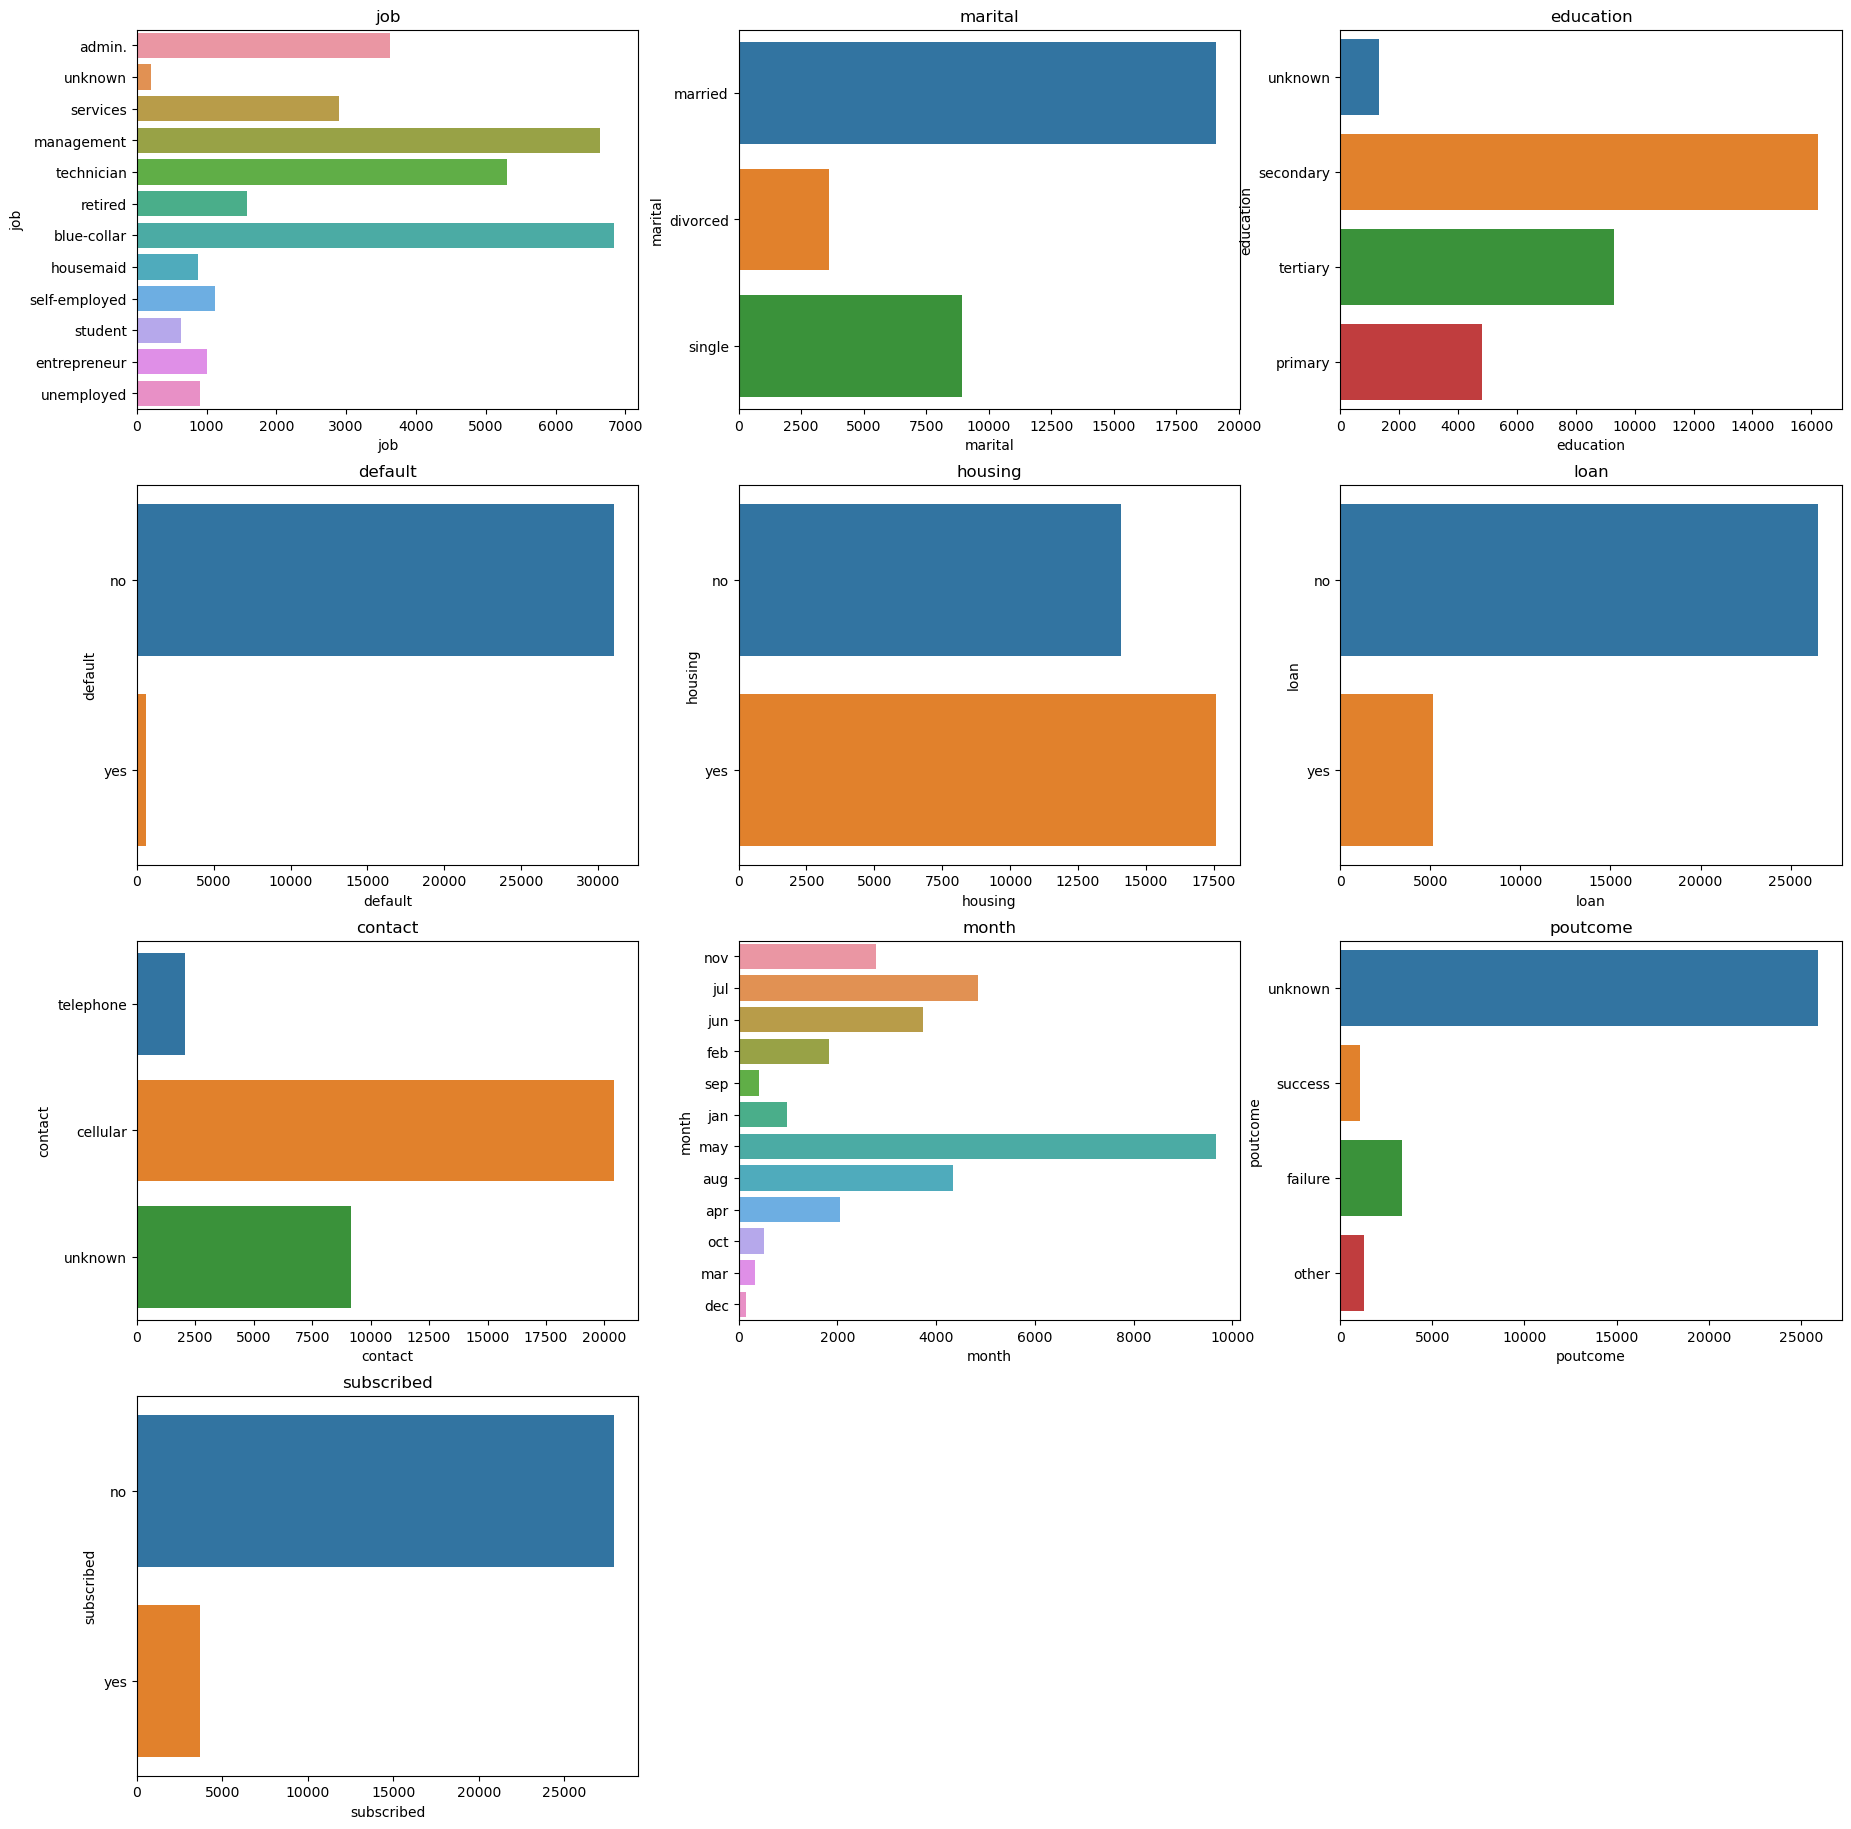

In [28]:
# Distribution of the Categorical variables
plt.figure(figsize=(22,70), facecolor='white')
plotnumber =1
for categorical_variable in categorical_variables:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_variable,data=df_train)
    plt.xlabel(categorical_variable)
    plt.title(categorical_variable)
    plotnumber+=1
plt.show()

The dataset shows that the most prevalent group consists of individuals working in blue-collar jobs, followed by married individuals and those with a secondary education. In contrast, students and divorced individuals are less represented. The "default" feature does not appear to have a significant impact, as the ratio of "no" to "yes" values is not substantial enough to greatly influence the occurrence of "yes" values. Additionally, there is a higher volume of data recorded in May compared to December.

**Bivariate Analysis**

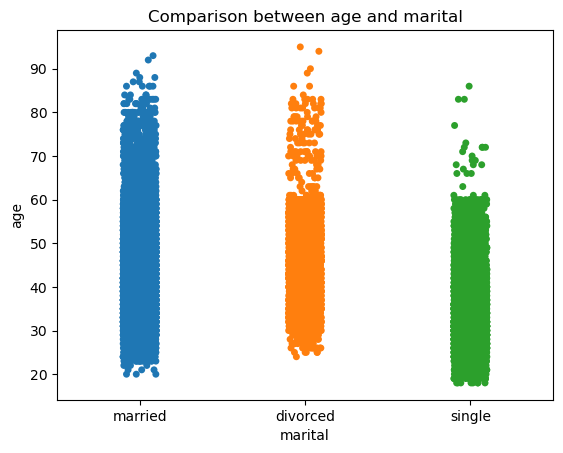

In [29]:
# Comparing age and marital
plt.title("Comparison between age and marital")
sns.stripplot(x = "marital", y = "age", data = df_train)
plt.show()

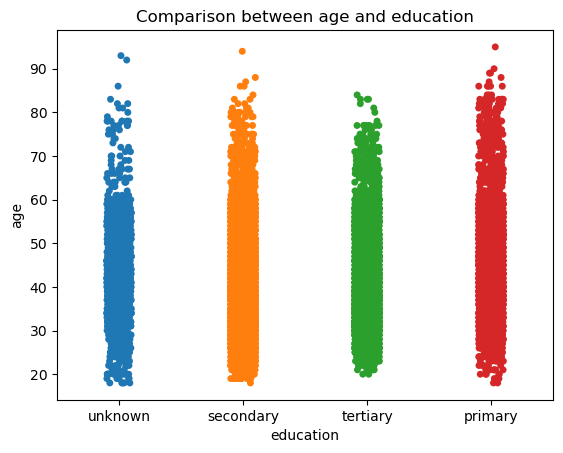

In [30]:
# Comparing age and education
plt.title("Comparison between age and education")
sns.stripplot(x = "education", y = "age", data = df_train)
plt.show()

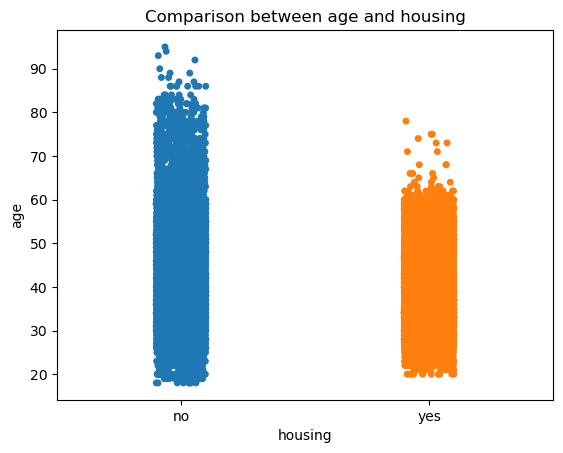

In [31]:
# Comparing age and housing
plt.title("Comparison between age and housing")
sns.stripplot(x = "housing", y = "age", data = df_train)
plt.show()

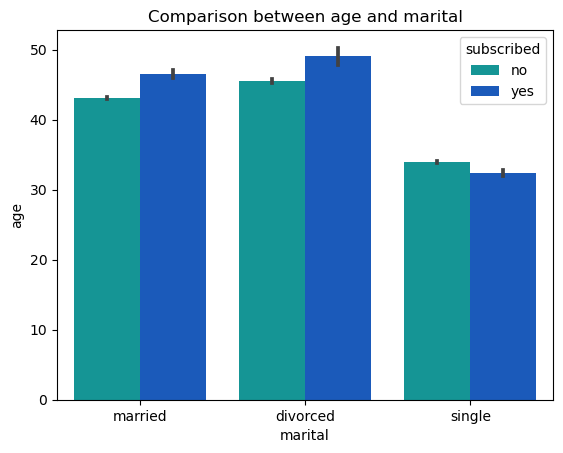

In [32]:
# Comparing marital and age on the basis of subscribers

plt.title("Comparison between age and marital")
sns.barplot(x = 'marital', y = 'age', data = df_train, palette = 'winter_r', hue = 'subscribed')
plt.show()

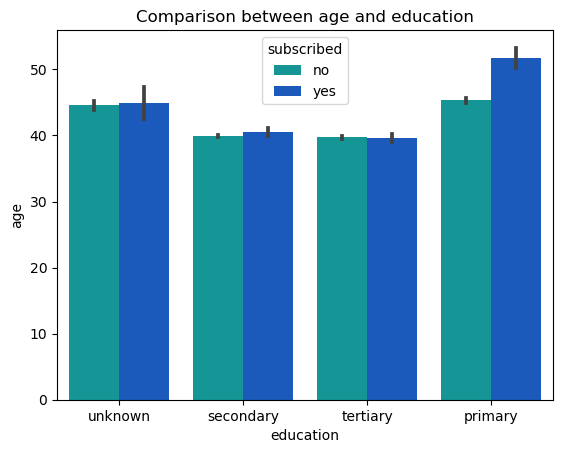

In [33]:
# Comparing age and education on the basis of subscribers

plt.title("Comparison between age and education")
sns.barplot(x = 'education', y = 'age', data = df_train, palette = 'winter_r', hue = 'subscribed')
plt.show()

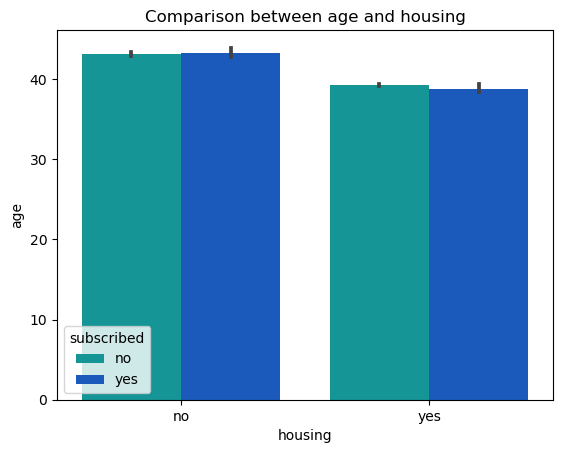

In [34]:
# Comparing age and housing on the basis of subscribers

plt.title("Comparison between age and housing")
sns.barplot(x = 'housing', y = 'age', data = df_train, palette = 'winter_r', hue = 'subscribed')
plt.show()

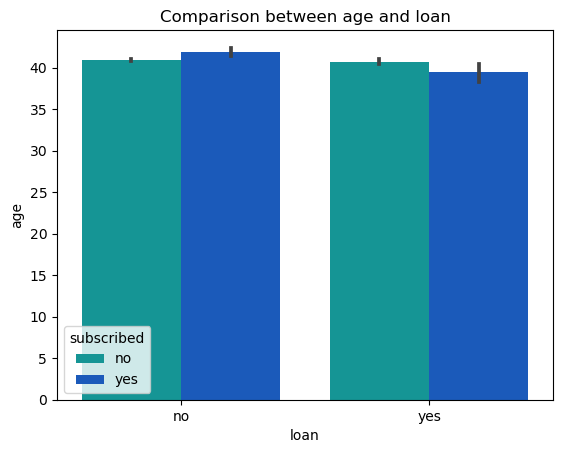

In [35]:
# Comparing age and loan on the basis of subscribers
plt.title("Comparison between age and loan")
sns.barplot(x = 'loan', y = 'age', data = df_train, palette = 'winter_r', hue = 'subscribed')
plt.show()

In [36]:
# Checking for subscribed and job using cross tabulation
print(pd.crosstab(df_train['job'],df_train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [37]:
job = pd.crosstab(df_train['job'],df_train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

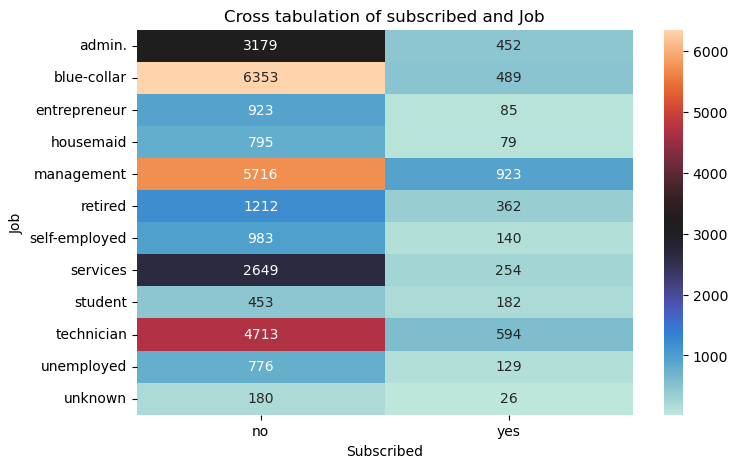

In [38]:
# Showing cross-tabualtion for subscribed and job in heatmap
plt.figure(figsize=(8, 5))

# Creating heatmap
sns.heatmap(job, annot=True, fmt='d', cmap='icefire')  

# Plot
plt.title('Cross tabulation of subscribed and Job')
plt.xlabel('Subscribed')
plt.ylabel('Job')

# Showing plot
plt.show()

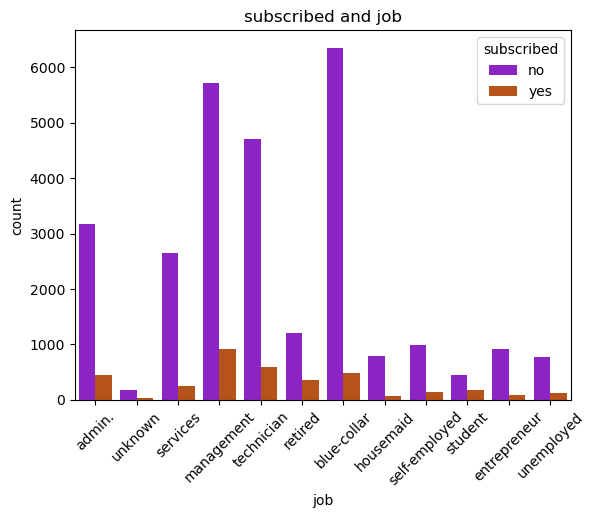

In [39]:
# Checking count of subscribed and job
sns.countplot(x='job', hue='subscribed', data=df_train, palette='gnuplot')

plt.title('subscribed and job')
plt.xlabel('job')
plt.ylabel('count')
plt.xticks(rotation=45)  

# Plot
plt.show()

subscribed     no   yes
marital                
divorced     3185   445
married     17176  1919
single       7571  1351


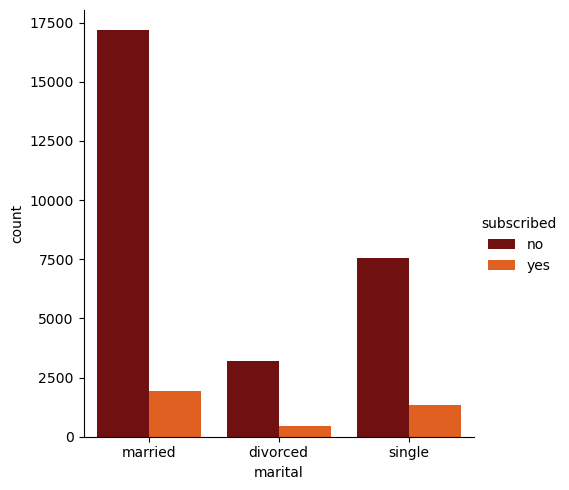

In [40]:
# Checking subscribed and marital
print(pd.crosstab(df_train['marital'],df_train['subscribed']))
sns.catplot(x = 'marital', hue = 'subscribed', palette = "gist_heat", kind = "count", data = df_train)
plt.show()

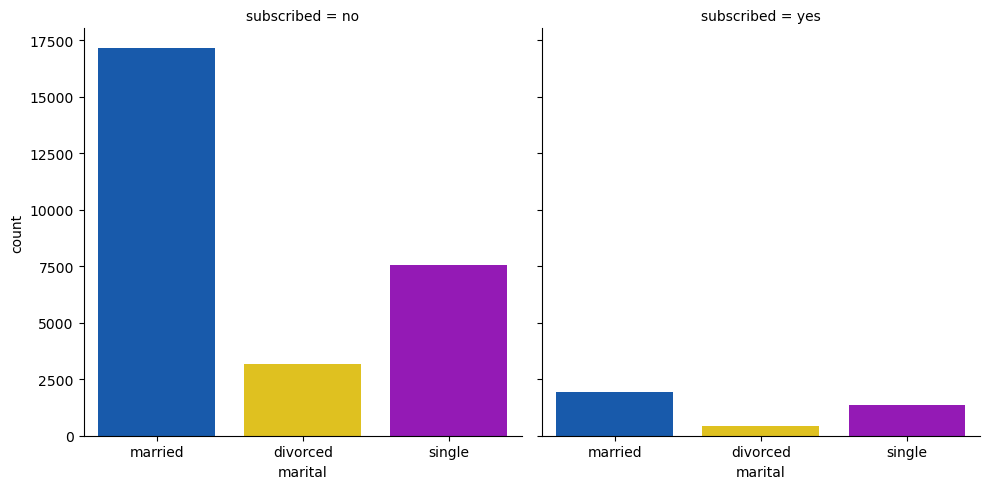

In [41]:
sns.catplot(x = 'marital', col = 'subscribed', palette = "prism", kind = "count", data = df_train)
plt.show()

subscribed     no   yes
education              
primary      4381   427
secondary   14527  1697
tertiary     7886  1415
unknown      1138   176


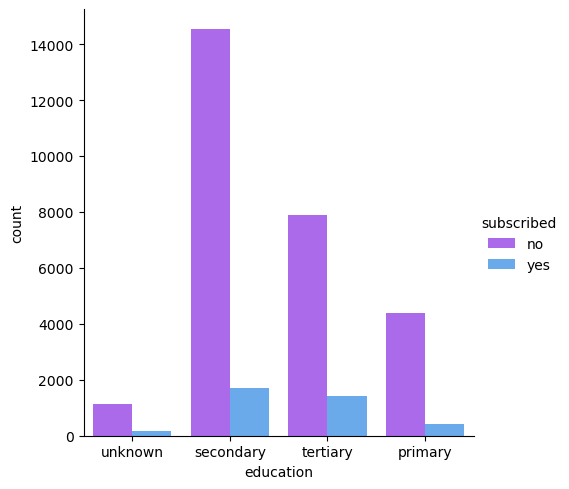

In [42]:
# Checking subscribed and education
print(pd.crosstab(df_train['education'],df_train['subscribed']))
sns.catplot(x = 'education', hue = 'subscribed', palette = "cool_r", kind = "count", data = df_train)
plt.show()

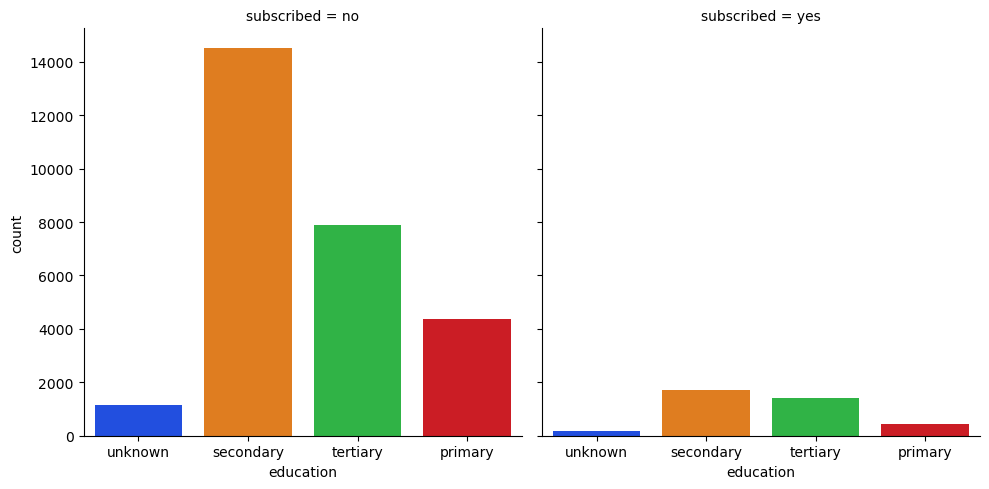

In [43]:
sns.catplot(x = 'education', col = 'subscribed', palette = "bright", kind = "count", data = df_train)
plt.show()

subscribed     no   yes
default                
no          27388  3674
yes           544    41


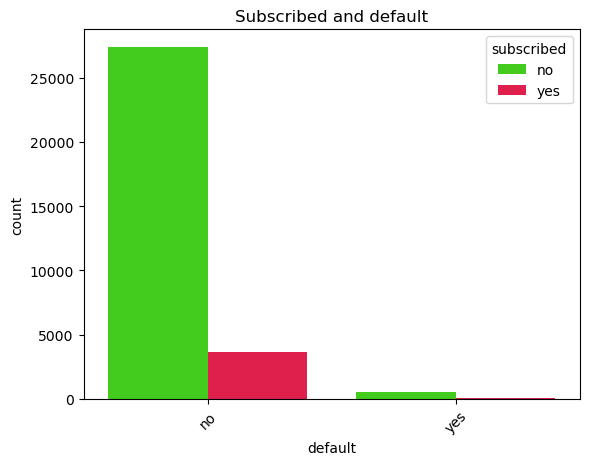

In [44]:
# Checking Count of default on the basis of subscribers
print(pd.crosstab(df_train['default'],df_train['subscribed']))

sns.countplot(x='default', hue='subscribed', data=df_train, palette='prism')

plt.title('Subscribed and default')
plt.xlabel('default')
plt.ylabel('count')
plt.xticks(rotation=45)  

# Plot
plt.show()

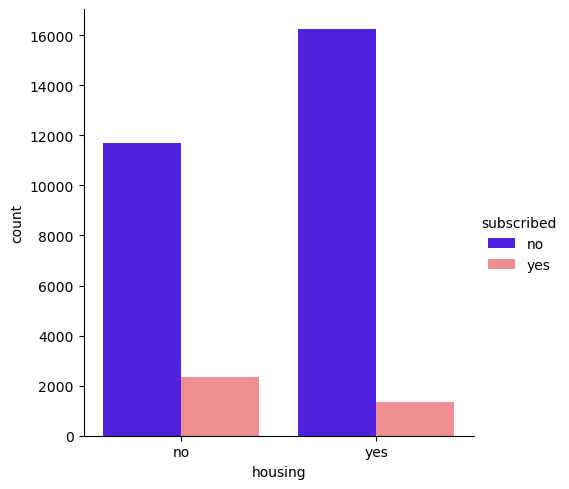

In [45]:
# Checking Subscribers and housing
sns.catplot(x = 'housing', hue = 'subscribed', palette = "gnuplot2", kind = "count", data = df_train)
plt.show()

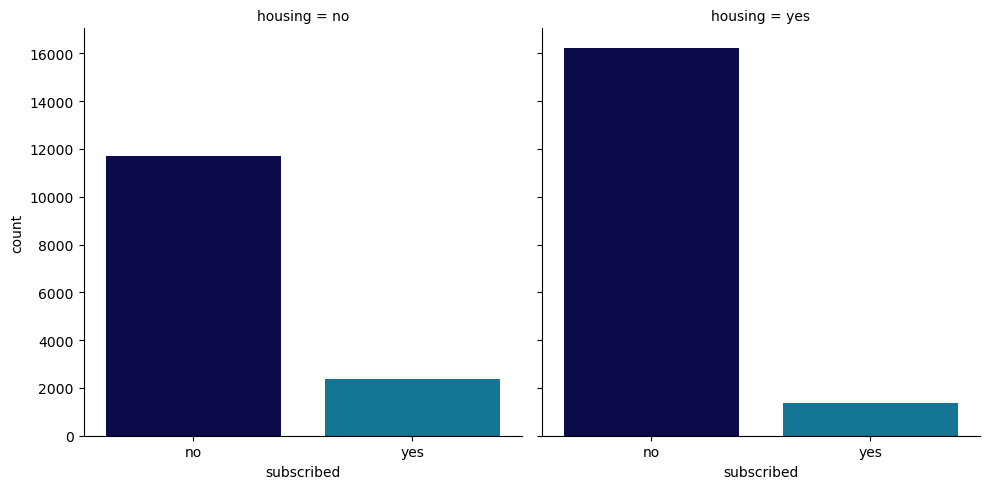

In [46]:
sns.catplot(x = 'subscribed', col = 'housing', data = df_train, palette = "ocean", kind = "count" )
plt.show()

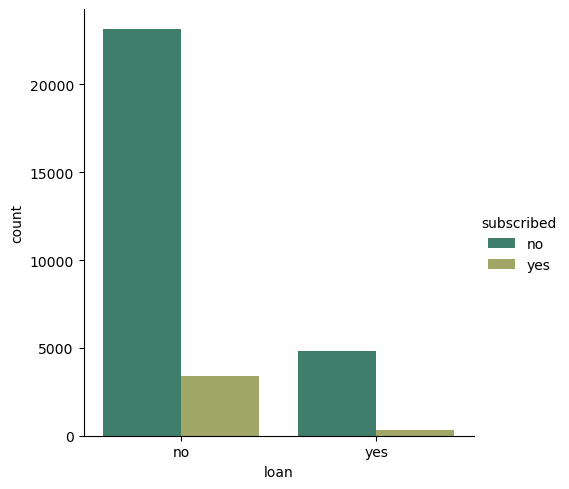

In [47]:
# Checking subscribers and loan
sns.catplot(x = 'loan', hue = 'subscribed', palette = "gist_earth", kind = "count", data = df_train)
plt.show()

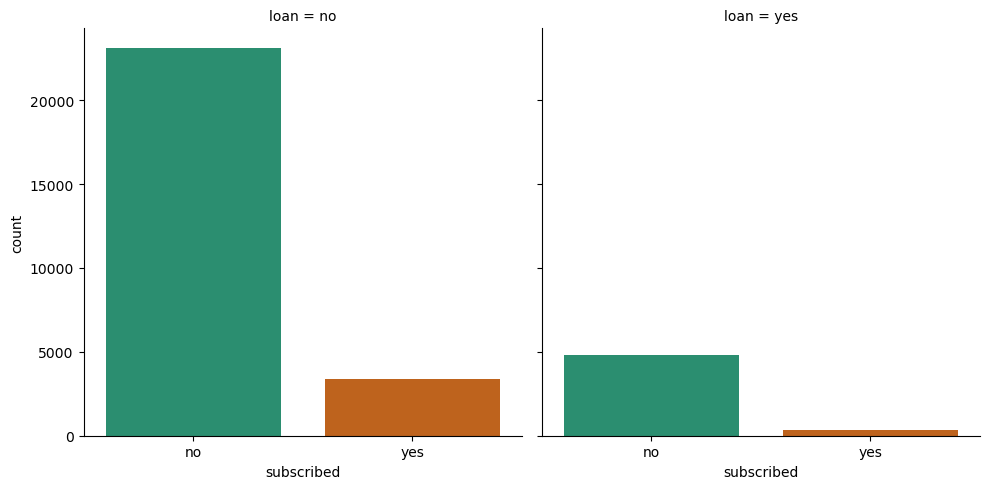

In [48]:
sns.catplot(x = 'subscribed', col = 'loan', data = df_train, palette = "Dark2", kind = "count" )
plt.show()

**Multivariate Analysis**

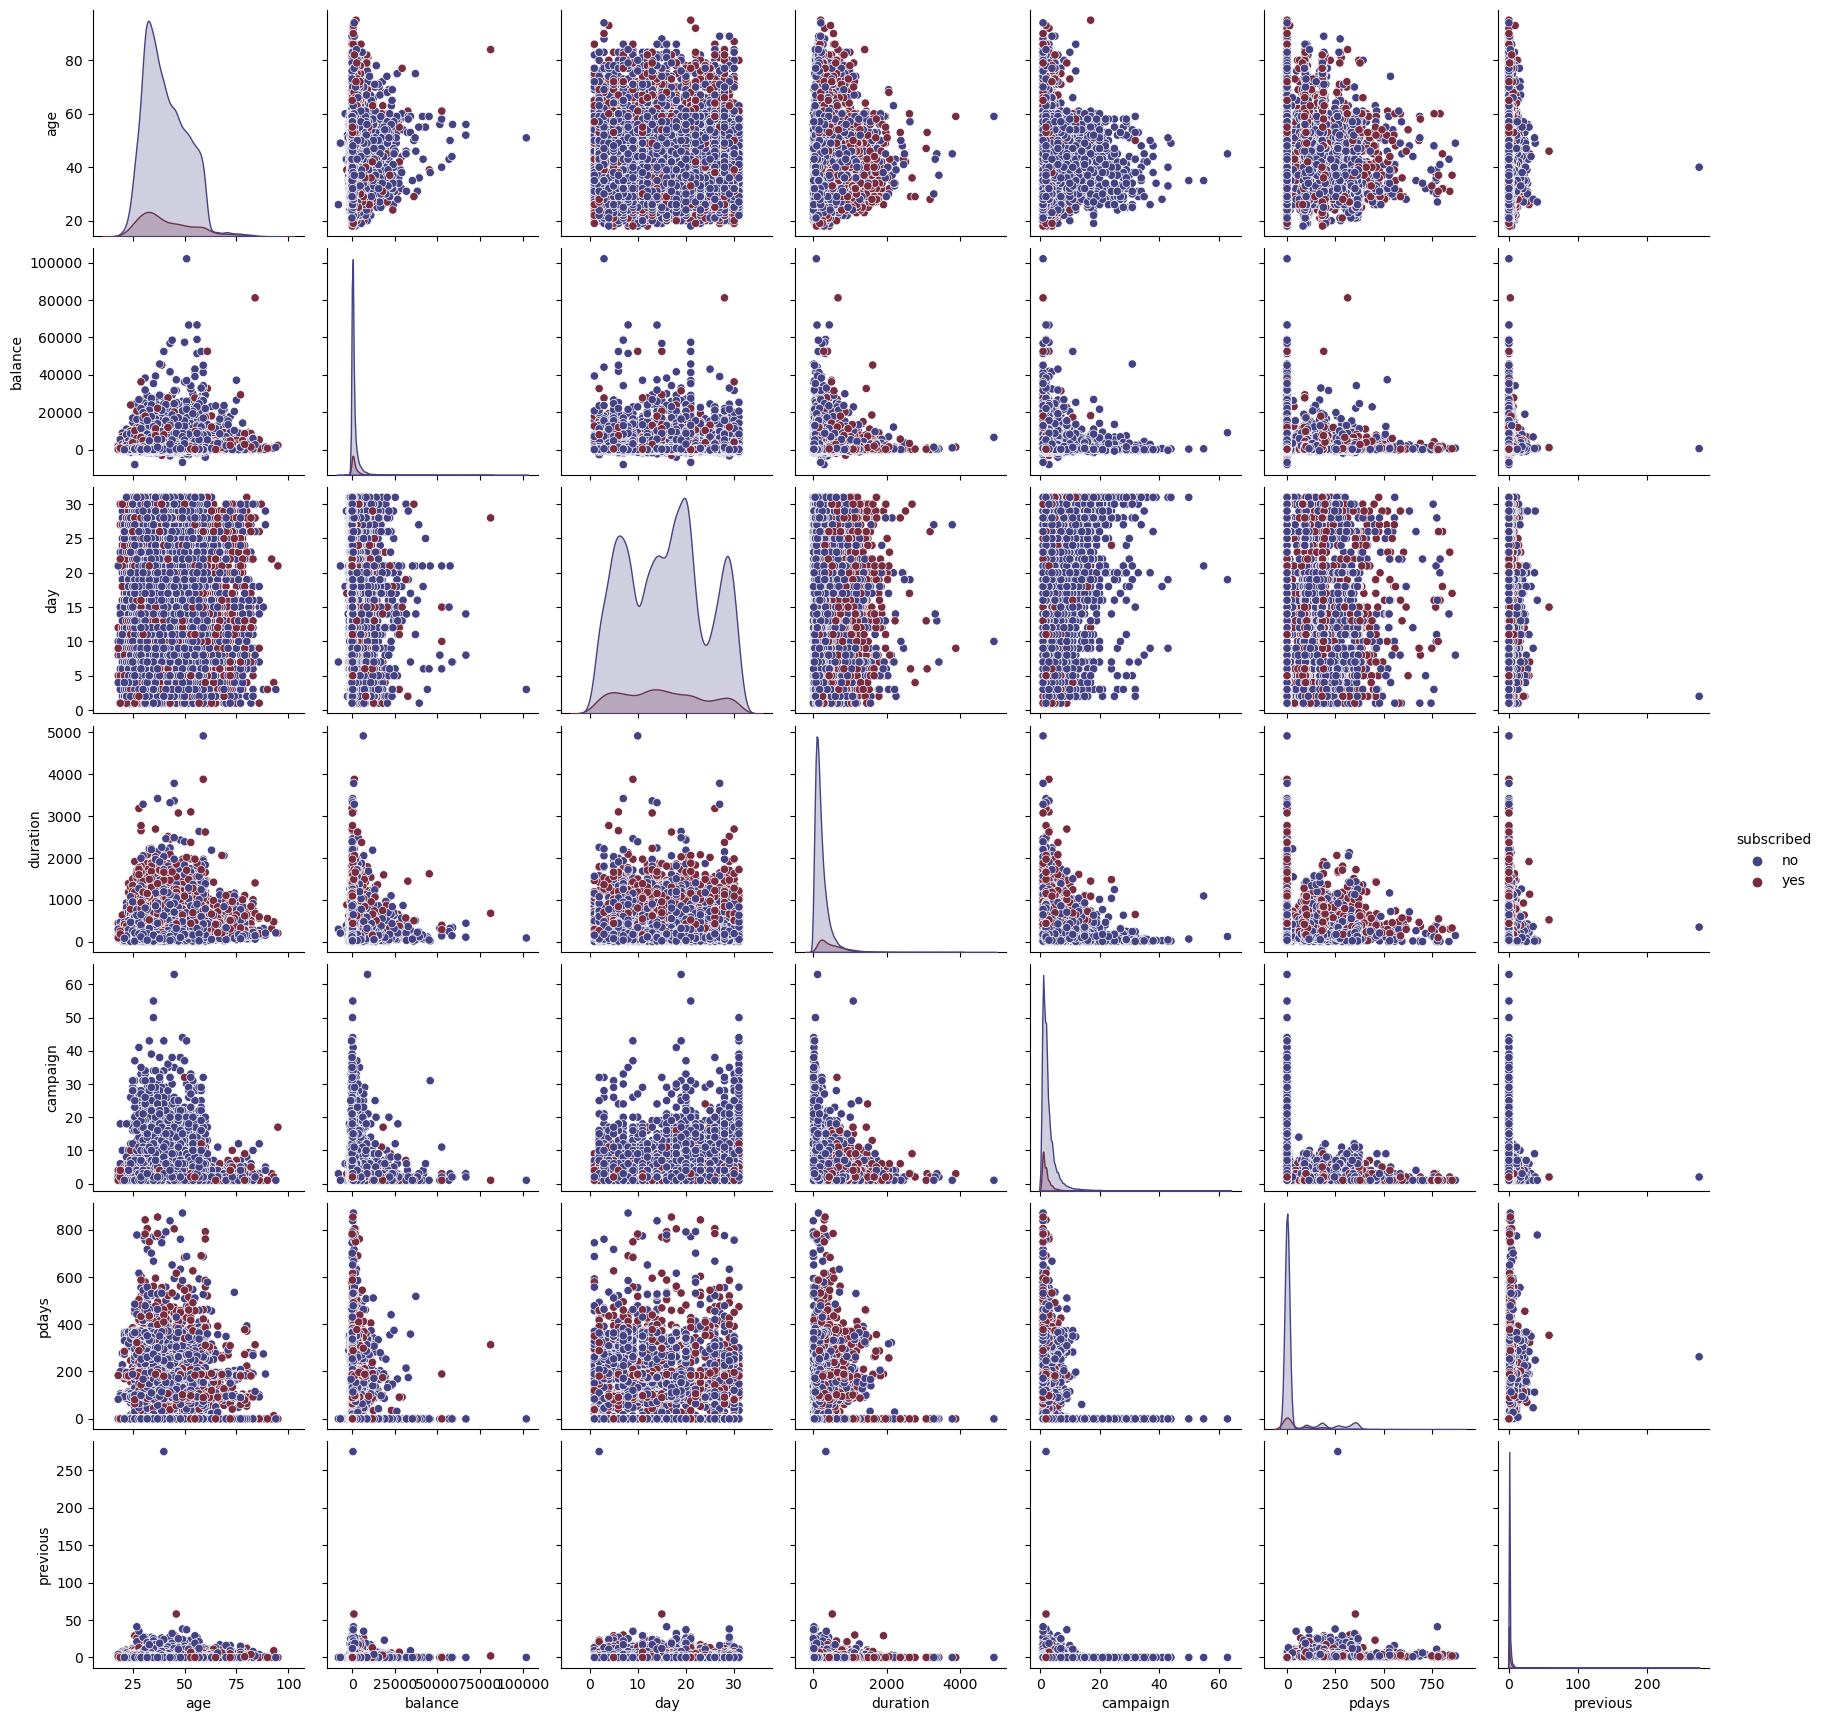

In [49]:
sns.pairplot(df_train, hue = "subscribed", palette = "icefire")
plt.show()

**Checking for and removing Outliers**

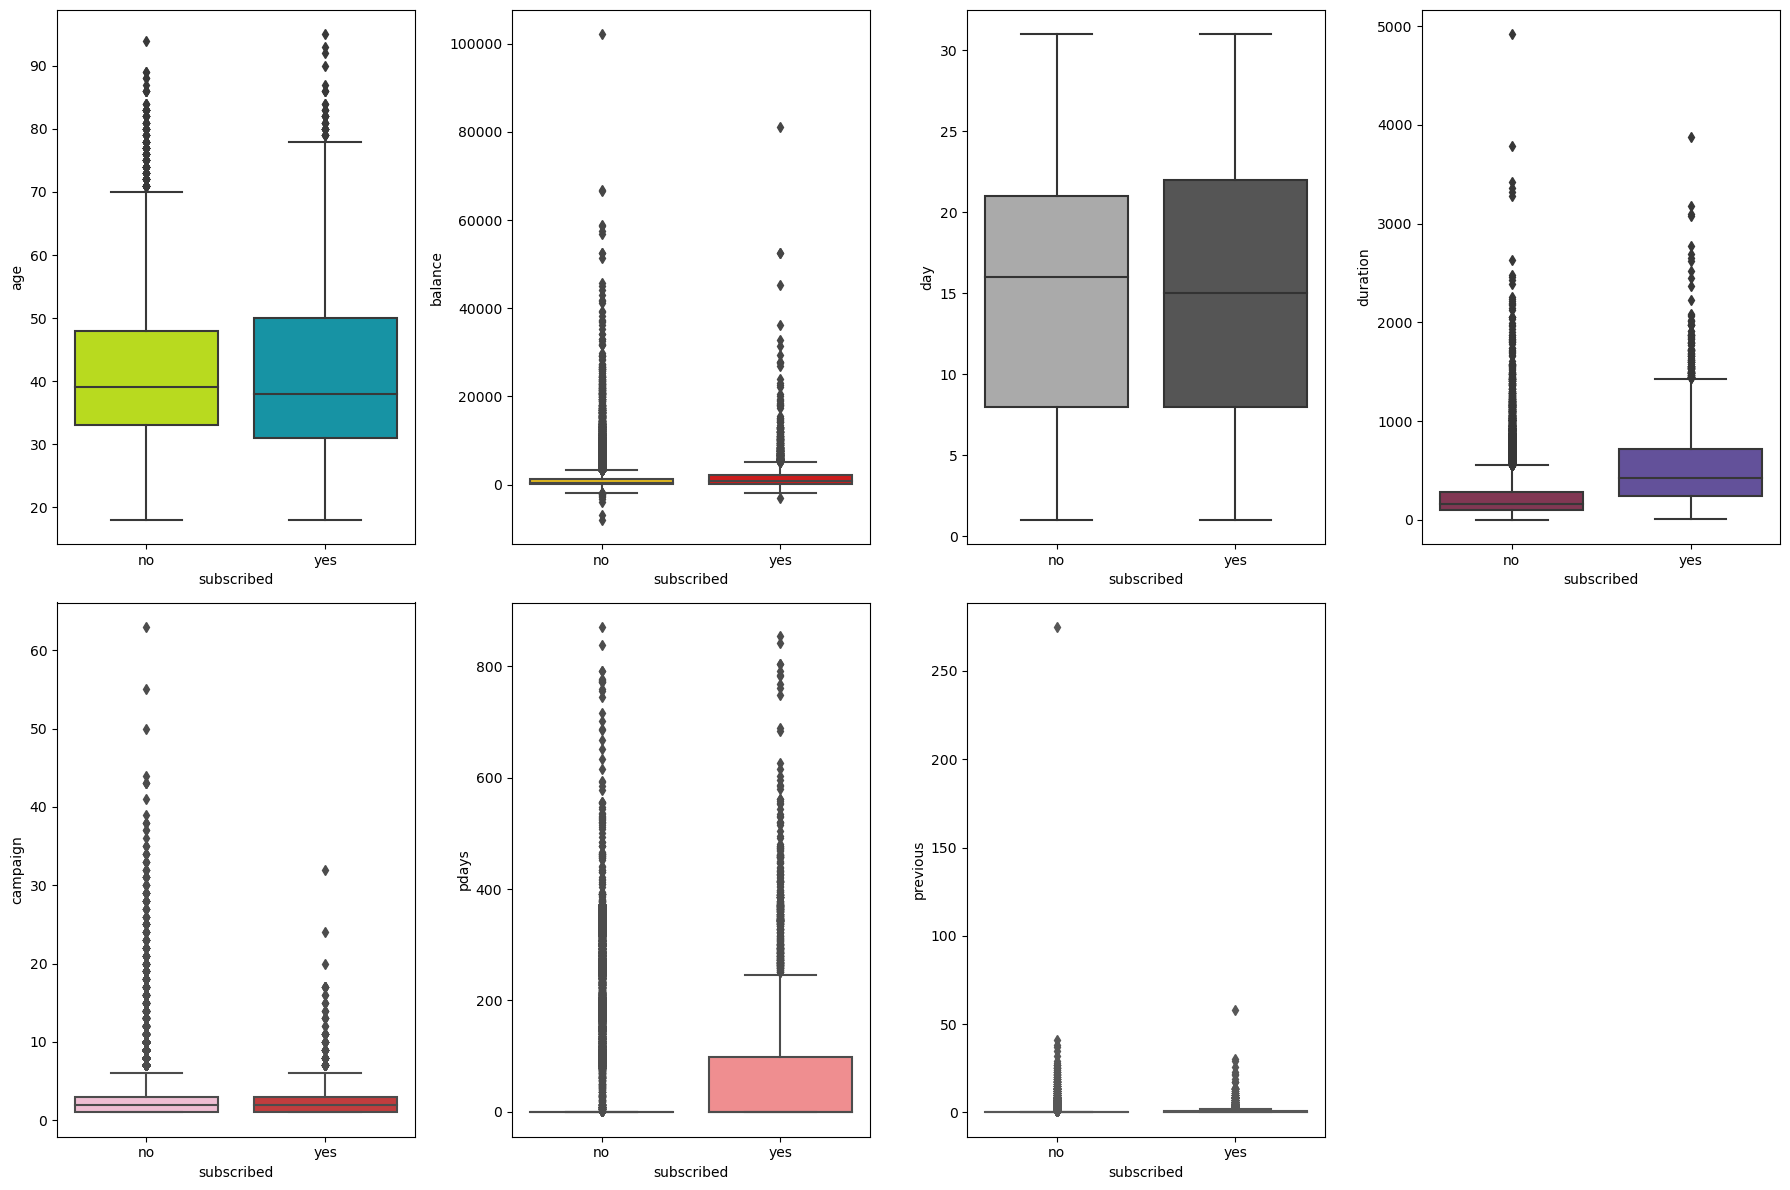

In [50]:
# visualizing Numerical features to find outliers
fig, axss = plt.subplots(2, 4, figsize=[18, 12])  # 2x4 grid to accommodate all 7 plots
sns.boxplot(x='subscribed', y='age', data=df_train, ax=axss[0][0], palette="nipy_spectral_r")
sns.boxplot(x='subscribed', y='balance', data=df_train, ax=axss[0][1], palette="hot_r")
sns.boxplot(x='subscribed', y='day', data=df_train, ax=axss[0][2], palette="gist_gray_r")
sns.boxplot(x='subscribed', y='duration', data=df_train, ax=axss[0][3], palette="twilight_r")
sns.boxplot(x='subscribed', y='campaign', data=df_train, ax=axss[1][0], palette="tab20_r")
sns.boxplot(x='subscribed', y='pdays', data=df_train, ax=axss[1][1], palette="gnuplot2")
sns.boxplot(x='subscribed', y='previous', data=df_train, ax=axss[1][2], palette="Purples_r")

# Removing the last subplot from the layout
fig.delaxes(axss[1][3])
plt.tight_layout()
plt.savefig('numerical_dist.png')
plt.show()

Outliers are visibly present in all numerical features with the exception of 'day'. As a result, we will proceed with the removal of these outliers.

**Checking zscore**

In [51]:
z=np.abs(zscore(df_train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]))
print(np.where(z>4))

(array([   21,    26,    36, ..., 31610, 31645, 31646], dtype=int64), array([4, 1, 5, ..., 6, 6, 3], dtype=int64))


In [52]:
z = np.abs(zscore(df_train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]))
threshold = 4
df1 = df_train[(z<4).all(axis = 1)]


In [53]:
print ("Shape of the dataframe before removing outliers: ", df_train.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df_train.shape[0]-df1.shape[0])/df_train.shape[0]*100)

Shape of the dataframe before removing outliers:  (31647, 17)
Shape of the dataframe after removing outliers:  (30335, 17)
Percentage of data loss post outlier removal:  4.145732612885897


In [54]:
df_train.shape

(31647, 17)

**Checking for Skewness**

In [55]:
df_train.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

The variables columns balance, duration, campaign, pdays, and previous exhibit significant right skewness. To address this skewness, we will employ the cube root method.

**Removing Skewness**

In [56]:
# Removing skewness using cuberoot method
df_train['balance'] = np .cbrt(df_train['balance'])
df_train['duration'] = np .cbrt(df_train['duration'])
df_train['campaign'] = np .cbrt(df_train['campaign'])
df_train['pdays'] = np .cbrt(df_train['pdays'])
df_train['previous'] = np .cbrt(df_train['previous'])         

We have removed the skewness using cube root method

In [57]:
# Let's Check the skewness again
df_train.skew()

age         0.681607
balance    -0.086014
day         0.087185
duration    0.647275
campaign    1.667938
pdays       1.779036
previous    2.079738
dtype: float64

It is evident that the level of skewness has been decreased.

**Lets visualize how the data has been distributed in the columns after removing skewness**

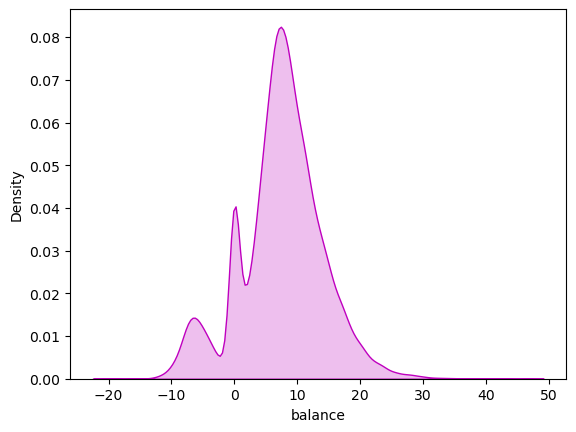

In [58]:
# data distribution in balance after skewness
sns.distplot(df_train['balance'], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

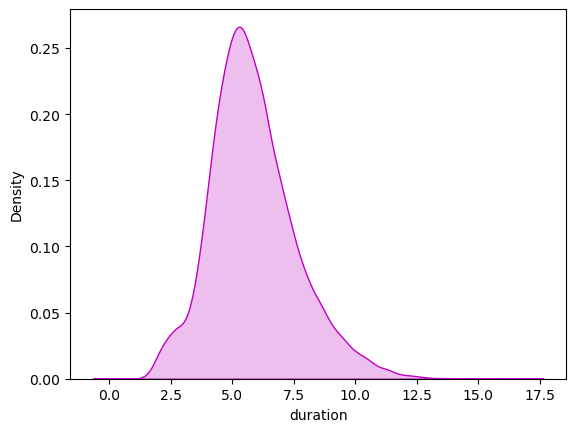

In [59]:
# data distribution in duration after skewness
sns.distplot(df_train['duration'],color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

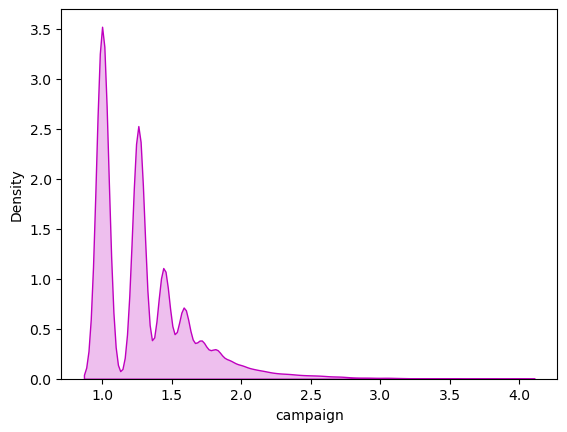

In [60]:
# data distribution in campaign after skewness
sns.distplot(df_train['campaign'],color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

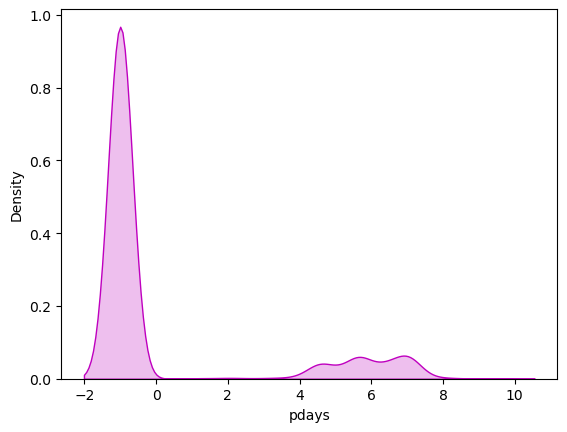

In [61]:
# data distribution in pdays after skewness
sns.distplot(df_train['pdays'],color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

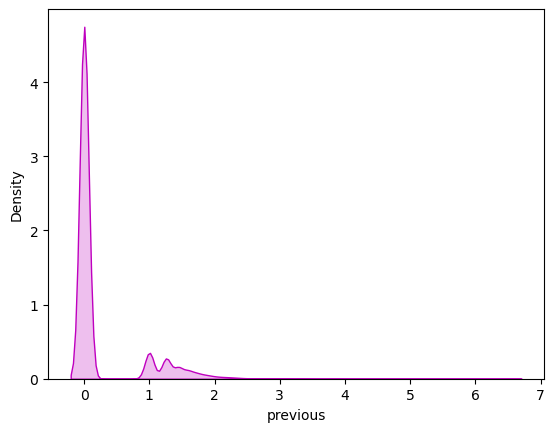

In [62]:
# data distribution in previous after skewness
sns.distplot (df_train['previous'],color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

**Encoding Categorical Columns**

In [63]:
# Encoding Categorical Columns using OrdinalEncoder
OE = OrdinalEncoder()
for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        df_train[i] = OE.fit_transform(df_train[i].values.reshape(-1,1))
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,12.456918,0.0,0.0,1.0,19,9.0,3.530348,1.259921,-1.000000,0.000000,3.0,0.0
1,31,11.0,1.0,1.0,0.0,1.442250,0.0,0.0,0.0,20,5.0,4.497941,1.259921,-1.000000,0.000000,3.0,0.0
2,27,7.0,1.0,1.0,0.0,9.622603,1.0,0.0,0.0,18,5.0,6.214465,1.000000,-1.000000,0.000000,3.0,0.0
3,57,4.0,0.0,2.0,0.0,14.868480,0.0,0.0,0.0,22,6.0,9.535417,1.000000,4.379519,1.442250,2.0,1.0
4,31,9.0,1.0,1.0,0.0,4.918685,1.0,0.0,0.0,4,3.0,7.243156,1.000000,-1.000000,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.0,12,8.0,4.876999,1.259921,-1.000000,0.000000,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,7.243156,0.0,1.0,0.0,5,6.0,7.594363,1.259921,-1.000000,0.000000,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,6.782423,0.0,0.0,0.0,7,1.0,3.332222,1.442250,-1.000000,0.000000,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,6.082202,1.0,0.0,1.0,15,8.0,2.802039,1.912931,6.958943,2.289428,0.0,0.0


In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         31647 non-null  int64  
 1   job         31647 non-null  float64
 2   marital     31647 non-null  float64
 3   education   31647 non-null  float64
 4   default     31647 non-null  float64
 5   balance     31647 non-null  float64
 6   housing     31647 non-null  float64
 7   loan        31647 non-null  float64
 8   contact     31647 non-null  float64
 9   day         31647 non-null  int64  
 10  month       31647 non-null  float64
 11  duration    31647 non-null  float64
 12  campaign    31647 non-null  float64
 13  pdays       31647 non-null  float64
 14  previous    31647 non-null  float64
 15  poutcome    31647 non-null  float64
 16  subscribed  31647 non-null  float64
dtypes: float64(15), int64(2)
memory usage: 4.1 MB


We have converted the categorical columns into numerical columns using Ordinal Encoding(OE) method.

In [65]:
# Here is the Statistical Summary of numerical
df_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,7.456890,0.555629,0.162132,0.644642,15.835466,5.533131,5.855894,1.304468,0.239014,0.245456,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,6.598377,0.496904,0.368578,0.899480,8.337097,3.004247,1.750566,0.348530,2.684057,0.546554,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-20.015821,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,4.179339,0.000000,0.000000,0.000000,8.000000,3.000000,4.702669,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,7.663094,1.000000,0.000000,0.000000,16.000000,6.000000,5.646216,1.259921,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,11.268857,1.000000,0.000000,2.000000,21.000000,8.000000,6.829198,1.442250,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,46.742671,1.000000,1.000000,2.000000,31.000000,11.000000,17.005765,3.979057,9.550059,6.502957,3.000000,1.000000


After encoding the categorical columns, a thorough summary of all column specifics can be obtained. Consistent counts for all columns suggest that there are no missing values in the dataset. The describe method offers statistical summaries such as **count, mean, standard deviation, minimum, interquartile range (IQR), and maximum values** for each column.

**Correlation between Target variable and Independent Variables.**

In [66]:
# Checking the correlation between features and the target.
cor = df_train.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.102655,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.008672,0.016974,-0.007257,0.004836,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.030541,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.001740,0.004734,-0.007784,0.000043,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.029260,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.013765,-0.020674,0.025247,0.026130,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.075759,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.002867,-0.001402,0.020848,0.029767,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.198400,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.009781,0.018914,-0.036851,-0.036702,0.035067,-0.020168
balance,0.102655,0.030541,0.029260,0.075759,-0.198400,1.000000,-0.087058,-0.142789,-0.047563,-0.011106,-0.002360,0.038476,-0.035939,0.060453,0.070936,-0.055961,0.097107
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.087058,1.000000,0.036244,0.195103,-0.025666,0.271442,0.001012,-0.033177,0.081725,0.053207,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.142789,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.011323,0.006838,-0.025042,-0.025072,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.047563,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.032611,0.014552,-0.281906,-0.273055,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,-0.011106,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.052736,0.164516,-0.084394,-0.078785,0.077586,-0.029600


This demonstrates the relationship between the dependent and independent variables. We can visually represent this association by creating a heatmap plot.

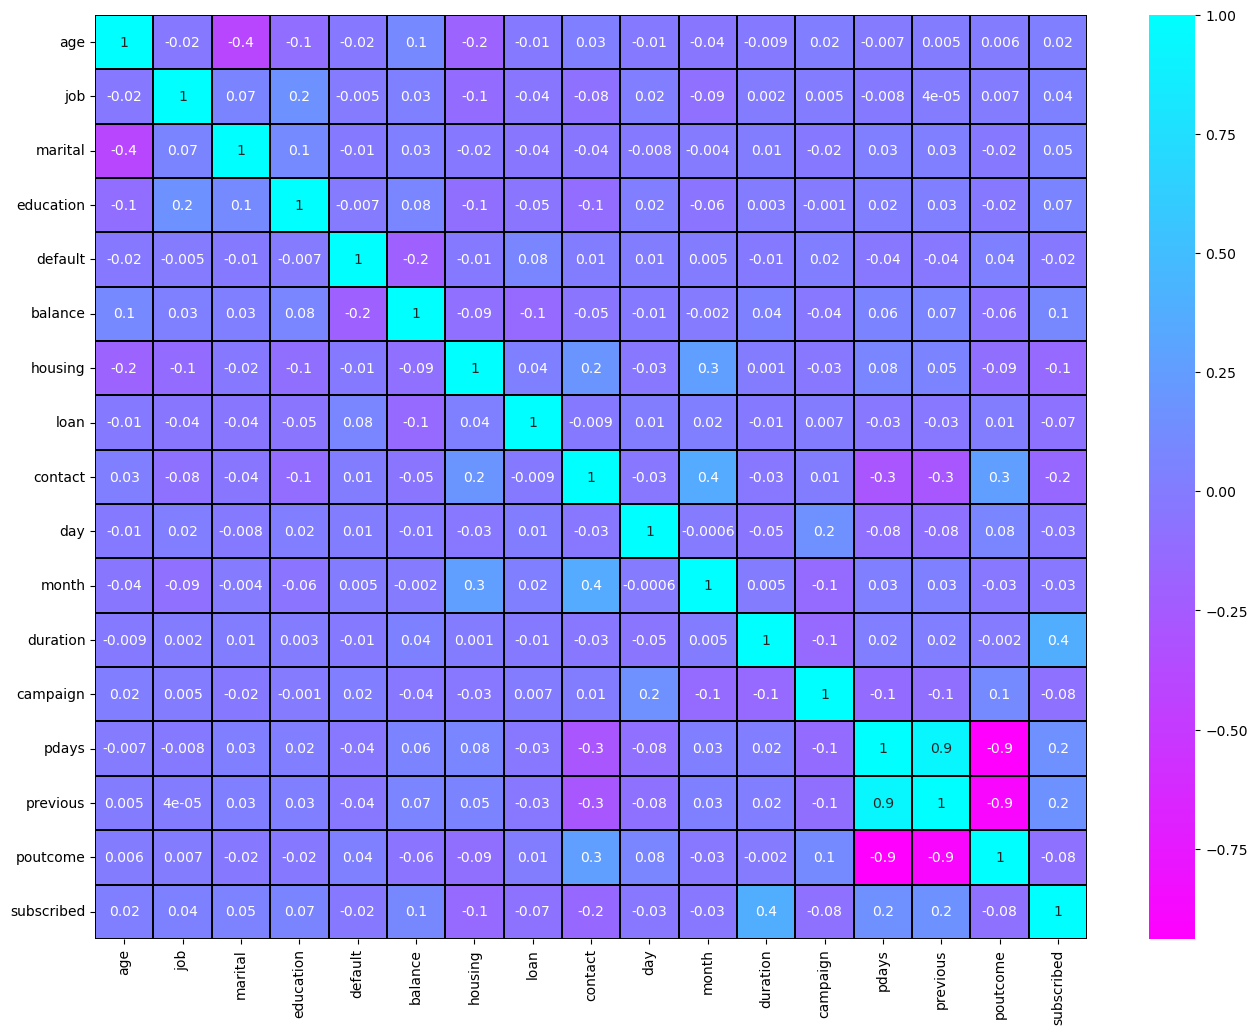

In [67]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (16, 12))
sns.heatmap(df_train.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "cool_r")
plt.yticks(rotation = 0);
plt.show()

In [68]:
# 0- no relation, -0.3 to +0.3- less correlation, greater than -0.5 or greater than +0.5- moderate correlation, greater than -0.7

In [69]:
cor['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.379716
previous      0.167908
pdays         0.152555
balance       0.097107
education     0.066051
marital       0.046043
job           0.038921
age           0.024538
default      -0.020168
month        -0.028088
day          -0.029600
loan         -0.072266
poutcome     -0.080895
campaign     -0.082134
housing      -0.141092
contact      -0.150051
Name: subscribed, dtype: float64

Here We are able to identify the +ve and -ve correlated features with the target variable.

**Visualizing the correlation between label and features using bar plot**

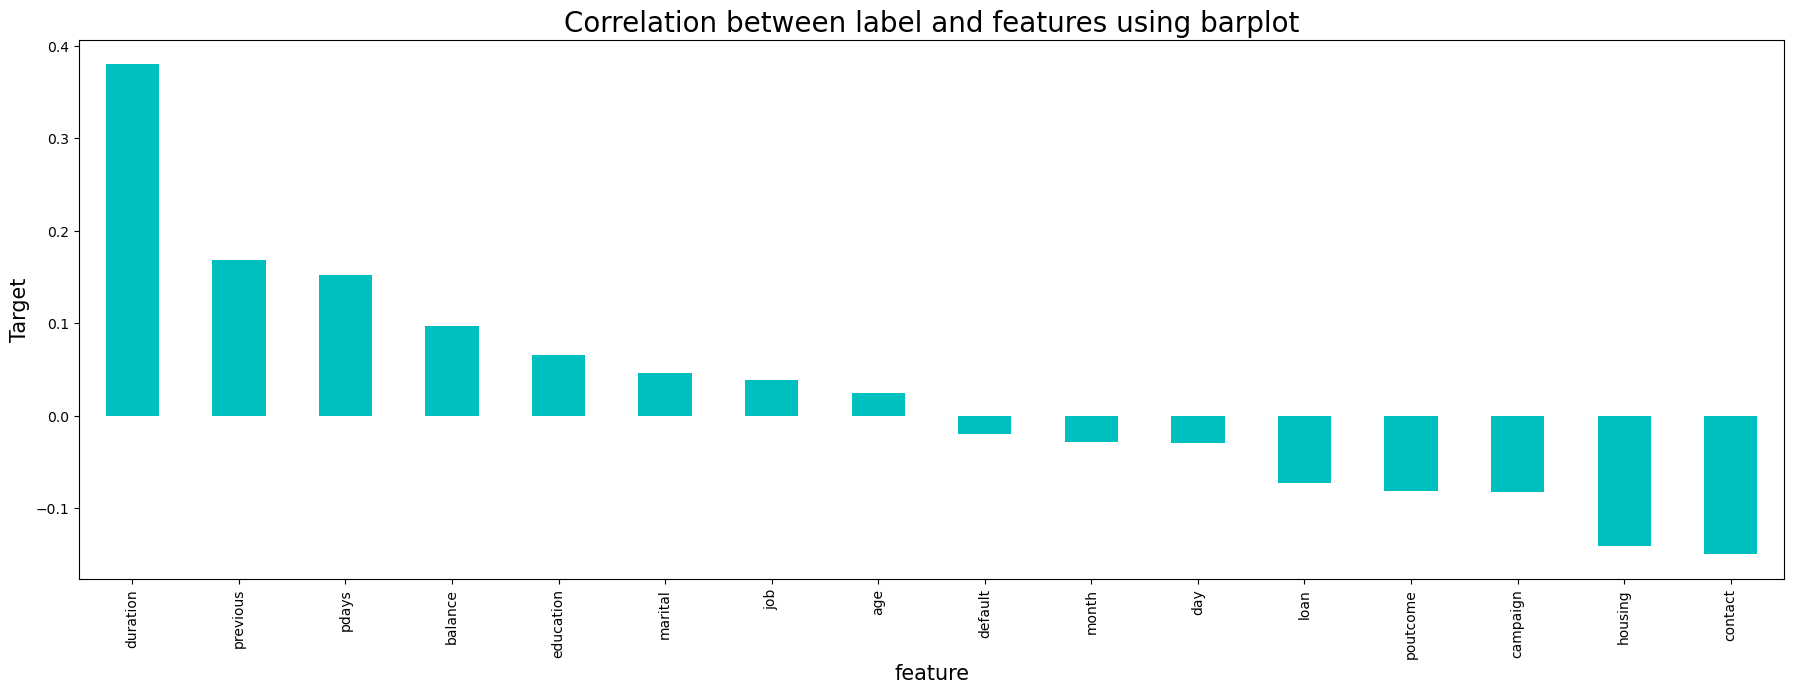

In [70]:
plt.figure(figsize = (22, 7))
df_train.corr()['subscribed'].sort_values(ascending = False).drop(['subscribed']).plot(kind='bar',color="c")
plt.xlabel('feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize=20)
plt.show()

The bar plot above displays positive and negative correlations between the features and the target variable. It is noteworthy that the features age, default, month, and day demonstrate minimal correlation with the target column.

**Separating Features and label**

In [71]:
x = df_train.drop("subscribed", axis =1)
y = df_train["subscribed"]

**Feature Scaling using standard scalarization**

In [72]:
Scaler = StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x), columns = x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.415793,-1.324317,-0.275405,2.369229,-0.137234,0.757778,-1.118201,-0.439893,0.395076,0.379579,1.154007,-1.328474,-0.127816,-0.461627,-0.449105,0.441777
1,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-0.911548,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.775734,-0.127816,-0.461627,-0.449105,0.441777
2,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,0.328224,0.894294,-0.439893,-0.716695,0.259631,-0.177462,0.204835,-0.873593,-0.461627,-0.449105,0.441777
3,1.509911,-0.101755,-1.922374,1.034442,-0.137234,1.123262,-1.118201,-0.439893,-0.716695,0.739422,0.155405,2.101938,-0.873593,1.542654,2.189741,-0.576498
4,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,-0.384677,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,0.792477,-0.873593,-0.461627,-0.449105,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.125392,-0.101755,1.371563,1.034442,-0.137234,-1.130128,0.894294,-0.439893,-0.716695,-0.460055,0.821140,-0.559197,-0.127816,-0.461627,-0.449105,0.441777
31643,1.133439,-0.101755,-1.922374,1.034442,-0.137234,-0.032392,-1.118201,2.273280,-0.716695,-1.299690,0.155405,0.993105,-0.127816,-0.461627,-0.449105,0.441777
31644,-0.843038,-0.101755,1.371563,1.034442,-0.137234,-0.102219,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,-1.441655,0.395329,-0.461627,-0.449105,0.441777
31645,1.509911,1.426448,-0.275405,-0.300345,-0.137234,-0.208341,0.894294,-0.439893,0.395076,-0.100212,0.821140,-1.744523,1.745828,2.503686,3.739801,-2.613048


We have used the Standard Scalarization method on the dataset in order to mitigate any potential biases.

**Checking Variance Inflation Factor(VIF)**

In [73]:
# Finding variance inflation factor in each scaled column i.e.x.shape[1] (1/(1-R2))
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,1.285140,age
1,1.050215,job
2,1.225466,marital
3,1.067156,education
4,1.046004,default
5,1.092365,balance
6,1.191676,housing
7,1.031387,loan
8,1.330288,contact
9,1.039538,day


The examination of the Variance Inflation Factor (VIF) helps in identifying features that contribute to multicollinearity problems. Our analysis reveals that the "pdays" feature shows a VIF value exceeding 10, suggesting a strong correlation with other features. As a result, we decide to eliminate this variable due to its high VIF value.

In [74]:
# Dropping pdays column
x.drop("pdays", axis = 1, inplace = True)

In [75]:
# Lets again check the VIF value to confirm the existence of multicollinearity
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
                    for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.284948,age
1,1.050016,job
2,1.225455,marital
3,1.066958,education
4,1.045992,default
5,1.092252,balance
6,1.190059,housing
7,1.030349,loan
8,1.326420,contact
9,1.039060,day


The issue of multicollinearity has been successfully addressed, allowing us to proceed with the development of our models.

### Balancing the Dataset

In [76]:
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

The observation here indicates an imbalance in the dataset. As the objective of this project involves classification, the intention is to rectify this imbalance through the utilization of an oversampling technique, specifically SMOTE, to achieve a balanced dataset.

### Oversampling

In [77]:
# Oversampling the data 
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [78]:
# checking the value count of target column
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

In [79]:
y1.value_counts()

0.0    27932
1.0    27932
Name: subscribed, dtype: int64

We can build our **Machine learning classification models** Now that the data is balanced.

## Machine Learning Models

**Finding the best random state**

In [80]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.9502386634844868 at random_state 110


**SPLITTING INTO TRAIN AND TEST**

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRs)

**Logistic Regression**

In [82]:
# Checking accuracy for the LR Model
LReg = LogisticRegression()
LReg.fit(x_train, y_train)
predLReg = LReg.predict(x_test)
print(accuracy_score(y_test, predLReg))
print(confusion_matrix(y_test, predLReg))
print(classification_report(y_test, predLReg))

0.8242243436754176
[[6875 1512]
 [1434 6939]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      8387
         1.0       0.82      0.83      0.82      8373

    accuracy                           0.82     16760
   macro avg       0.82      0.82      0.82     16760
weighted avg       0.82      0.82      0.82     16760



The accuracy score using Logistic Regression is 82%

**RandomForestClassifier**

In [83]:
# Checking accuracy for RF-Classifier
RandFC = RandomForestClassifier()
RandFC.fit(x_train, y_train)
predRandFC = RandFC.predict(x_test)
print(accuracy_score(y_test, predRandFC))
print(confusion_matrix(y_test, predRandFC))
print(classification_report(y_test, predRandFC))

0.9485680190930788
[[7807  580]
 [ 282 8091]]
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      8387
         1.0       0.93      0.97      0.95      8373

    accuracy                           0.95     16760
   macro avg       0.95      0.95      0.95     16760
weighted avg       0.95      0.95      0.95     16760



The accuracy score using Random Forest Classifier is 95%

**Decision Tree Classifier**

In [84]:
# Checking accuracy for DT-Classifier
DTree = DecisionTreeClassifier()
DTree.fit(x_train, y_train)
predDTree = DTree.predict(x_test)
print(accuracy_score(y_test, predDTree))
print(confusion_matrix(y_test, predDTree))
print(classification_report(y_test, predDTree))

0.9013723150357995
[[7538  849]
 [ 804 7569]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      8387
         1.0       0.90      0.90      0.90      8373

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.90      0.90      0.90     16760



The accuracy score using Decision Tree Classifier is 90%

**Support Vector Machine (SVC) Classifier**

In [85]:
# Checking accuracy for SVC-Classifier
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
predsvm_classifier = svm_classifier.predict(x_test)
print(accuracy_score(y_test, predsvm_classifier))
print(confusion_matrix(y_test, predsvm_classifier))
print(classification_report(y_test, predsvm_classifier))

0.8704057279236277
[[6915 1472]
 [ 700 7673]]
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86      8387
         1.0       0.84      0.92      0.88      8373

    accuracy                           0.87     16760
   macro avg       0.87      0.87      0.87     16760
weighted avg       0.87      0.87      0.87     16760



The accuracy score using SVM Classifier is 87%

**Gradient Boosting Classifier**

In [86]:
# accuracy for Gradient Boosting Classifier
GBoost = GradientBoostingClassifier()
GBoost.fit(x_train, y_train)
predGBoost = GBoost.predict(x_test)
print(accuracy_score(y_test, predGBoost))
print(confusion_matrix(y_test, predGBoost))
print(classification_report(y_test, predGBoost))

0.9121121718377089
[[7465  922]
 [ 551 7822]]
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      8387
         1.0       0.89      0.93      0.91      8373

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760



The accuracy score using GradientBoost Classifier is 91%

**Cross Validation Score**

In [87]:
# checking cv score for Logistic Regression
score = cross_val_score(LReg,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predLReg)- score.mean())

[0.89352291 0.89684044 0.89145205 0.89398009 0.89477011]
0.8941131185543014
Difference between Accuracy score and cross validation score is - -0.06988877487888379


In [88]:
# checking cv score for Random Forest classifier
score = cross_val_score(RandFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predRandFC)- score.mean())

[0.90600316 0.90315956 0.90472429 0.90235424 0.90172223]
0.9035926951266482
Difference between Accuracy score and cross validation score is - 0.04497532396643056


In [89]:
# checking cv score for DecisionTree classifier
score = cross_val_score(DTree,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predDTree)- score.mean())

[0.87503949 0.86761453 0.87091168 0.86917365 0.8721757 ]
0.8709830098268784
Difference between Accuracy score and cross validation score is - 0.030389305208921136


In [90]:
# checking cv score for SVM classifier
score = cross_val_score(svm_classifier,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predsvm_classifier)- score.mean())

[0.89684044 0.90173776 0.89492811 0.89793016 0.89808817]
0.8979049272175998
Difference between Accuracy score and cross validation score is - -0.027499199293972154


In [91]:
# checking cv score for Gradient Boosting Classifier
score = cross_val_score(GBoost,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predGBoost)- score.mean())

[0.90489731 0.90537125 0.89903618 0.90251225 0.89903618]
0.9021706345848507
Difference between Accuracy score and cross validation score is - 0.009941537252858179


The **Gradient Boosting Classifier** has the least absolute difference between the model's accuracy and cross-validation accuracy and therefore selected as the final model.

The **Gradient Boosting Classifier** is our best model

**Hyper Parameter Tunning**

In [92]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

# Instantiate the GradientBoostingClassifier
GBoost = GradientBoostingClassifier()

# Instantiate GridSearchCV
GCV = GridSearchCV(estimator=GBoost, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [93]:
GCV.best_params_

{'max_depth': 7, 'n_estimators': 150}

In [94]:
# Get the best estimator
Final_model = GCV.best_estimator_

# Fit the final model
Final_model.fit(x_train, y_train)

# Make predictions
pred = Final_model.predict(x_test)

# Calculate accuracy
acc = accuracy_score(y_test, pred)
print(acc * 100)

94.80310262529834


**Plotting ROC and compare AUC for all the models used**

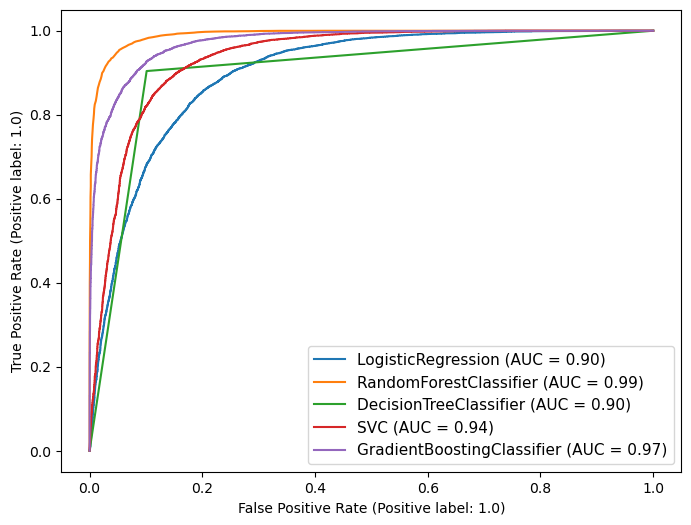

In [95]:
# Fit the GradientBoostingClassifier model
GBoost.fit(x_train, y_train)

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC curve for each model
plot_roc_curve(LReg, x_test, y_test, ax=ax)
plot_roc_curve(RandFC, x_test, y_test, ax=ax)
plot_roc_curve(DTree, x_test, y_test, ax=ax)
plot_roc_curve(svm_classifier, x_test, y_test, ax=ax)
plot_roc_curve(GBoost, x_test, y_test, ax=ax)

# Add legend
plt.legend(prop={'size': 11}, loc='lower right')

# Show plot
plt.show()

While this approach is no longer in use, we can observe the area under the curve (AUC) for each model that was employed.

**Alternative method**

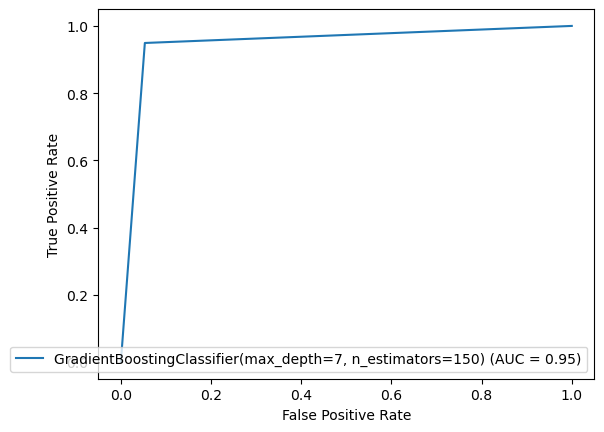

In [96]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

The final model was assessed using a ROC curve, which is depicted above and has an AUC value of 95%, indicating its superior performance.

**Saving the Model**

In [97]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model, "Subscription to Bank Term Deposit.pki")

['Subscription to Bank Term Deposit.pki']

In [98]:
# Lets load the saved model and get the predictions
model = joblib.load("Subscription to Bank Term Deposit.pki")

# prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 0., ..., 0., 1., 0.])

This are the predicted number of subscribers for the bank's term deposit (fixed deposit) products.

In [99]:
a = np.array(y_test)
df_test = pd.DataFrame()
df_test["predicted"] = prediction
df_test["original"] = a
df_test

,predicted,original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
16755,1.0,1.0
16756,0.0,0.0
16757,0.0,0.0
16758,1.0,1.0


### Predicting on  the Test Model

In [100]:
modelname = GradientBoostingClassifier()

In [101]:
# Training the model on the training data
modelname.fit(x_train, y_train)

GradientBoostingClassifier()

In [102]:
# Make predictions on the test data
predictions = modelname.predict(x_test)

In [103]:
conclusion = pd.DataFrame({'Predicted': predictions, 'Original': y_test})

In [104]:
# Creating a dictionary with your data
data = {
    'Predicted': modelname.predict(x_test),
    'Original': y_test
}

In [105]:
# Creating a DataFrame from the data dictionary
conclusion = pd.DataFrame(data)

In [106]:
# Create a DataFrame with 'Predicted' and 'Original' columns
conclusion = pd.DataFrame({'Predicted': modelname.predict(x_test), 'Original': y_test})

In [107]:
print(conclusion)

       Predicted  Original
55660        1.0       1.0
13256        0.0       0.0
4179         0.0       0.0
35317        1.0       1.0
45372        1.0       1.0
...          ...       ...
22507        1.0       1.0
28514        0.0       0.0
17893        0.0       0.0
33608        1.0       1.0
3270         0.0       0.0

[16760 rows x 2 columns]


### Summary and Conclusion

In summary, the retail banking institution in Portugal sought to counter declining revenue by prioritizing term deposit subscriptions through targeted marketing initiatives. This project aimed to predict the likelihood of client subscriptions by utilizing various client data and call details provided by the bank.Different machine learning models which includes the **Logistic Regression, Random Forest Classifier, Decision Tree Classifier, SVM Classifier, and Gradient Boosting Classifier** were utilized and assessed using precision, recall, F1-score, ROC-AUC, and accuracy metrics. The targeted benchmark accuracy for all models was established at (0.95) and above. Among the models examined, the **Gradient Boosting Classifier** emerged as the preferred model due to its well-balanced performance. The **Gradient Boosting Classifier** exhibited satisfactory performance metrics, signifying its ability to accurately predict term deposit subscriptions. With an accuracy of 91%, ROC-AUC of 95% and close alignment between predicted outcomes and original data, the model offers valuable insights into potential term deposit subscribers, empowering the bank to optimize its marketing strategies and reduce costs efficiently. In conclusion, this project illustrates the efficacy of machine learning in predicting customer behavior and refining marketing efforts within the banking industry. Through leveraging **Predictive Analytics**, the bank can enhance its revenue generation via targeted marketing campaigns directed at potential term deposit subscribers.

**The End**